<a href="https://colab.research.google.com/github/wkgit0/-Pakistani-Indian-Dishes-Recipe-Recommendation-System-by-Ingredients/blob/main/Pakistani/Indian%20Dishes%20Recipe%20Recommendation%20System%20by%20Ingredients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import re
import spacy

In [9]:
import pandas as pd

# Use pd.read_excel instead of pd.read_csv for Excel files
df = pd.read_excel('Pakistani_Dishes_Enhanced.xlsx')  # Update with your dataset filename

# Rest of your code remains the same
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 500 non-null    int64  
 1   Title              500 non-null    object 
 2   Ingredients        500 non-null    object 
 3   Spices             500 non-null    object 
 4   Recipe             500 non-null    object 
 5   Cooking Time       500 non-null    object 
 6   Calories per 50g   500 non-null    float64
 7   Calories per 100g  500 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 31.4+ KB


In [10]:
df = df.T.reset_index().drop(columns=['index'])
df.head(1)


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500


In [11]:
recipes = pd.concat([df]).reset_index(drop=True)
recipes.shape

(8, 500)

In [12]:
# Count of missing values by category
# As a DataFrame for clearer display
missing_df = df.isnull().sum().reset_index()
missing_df.columns = ['Column', 'Missing Values']
print(missing_df)


     Column  Missing Values
0         0               0
1         1               0
2         2               0
3         3               0
4         4               0
..      ...             ...
495     495               0
496     496               0
497     497               0
498     498               0
499     499               0

[500 rows x 2 columns]


In [14]:
# Exclude 'picture' column
columns_to_check = df.columns.difference(['picture'])  # Define columns_to_check here

# Boolean mask for recipes with missing values

missing_rows = df[columns_to_check].isnull().any(axis=1).sum()

print(f"Number of recipes with missing values): {missing_rows}")

Number of recipes with missing values): 0


In [15]:
# Exclude 'picture' column
columns_to_check = recipes.columns.difference(['picture'])

# Boolean mask for recipes with missing values
null_recs = recipes[columns_to_check].isnull().any(axis=1)
recipes[null_recs].head()


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499


In [16]:
rows_to_drop = recipes[null_recs].index
recipes = recipes.drop(index = rows_to_drop).reset_index(drop = True)
recipes.shape

(8, 500)

In [17]:
recipes.dtypes

,0
0,object
1,object
2,object
3,object
4,object
...,...
495,object
496,object
497,object
498,object


In [18]:

# Function to check if a value is only punctuation or numbers
def is_num_or_punct_only(val):
    if isinstance(val, str):
        return bool(re.fullmatch(r'[\d\W]+', val))
    return False

# Apply the function to the entire DataFrame
mask = recipes.applymap(is_num_or_punct_only)

# Count how many such rows per column
counts = mask.sum()

# Show the counts
print("Rows with only numbers/punctuation per column:")
print(counts)


Rows with only numbers/punctuation per column:
0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Length: 500, dtype: int64


<ipython-input-18-4d32e5017ff0>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = recipes.applymap(is_num_or_punct_only)


In [19]:
# Example of defining the index_list (you should modify this according to your case)
index_list = [0, 3, 5, 7]  # Assuming you want to drop rows with indices 0, 3, 5, and 7

# Step 1: Make sure index_list contains unique values
index_list = list(set(index_list))

# Step 2: Drop rows from recipes based on index_list
recipes_cleaned = recipes.drop(index=index_list)

# Step 3: Reset index (optional but recommended)
recipes_cleaned = recipes_cleaned.reset_index(drop=True)

# Optional: Check how many rows were dropped
print(f"Removed {len(index_list)} unusable recipes.")
print(f"Remaining recipes: {recipes_cleaned.shape[0]}")


Removed 4 unusable recipes.
Remaining recipes: 4


In [20]:
# Convert column names to strings before stripping
recipes.columns = recipes.columns.astype(str).str.strip()

# Now print the columns again to check for any changes
print(recipes.columns)


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '490', '491', '492', '493', '494', '495', '496', '497', '498', '499'],
      dtype='object', length=500)


In [21]:
# Print the first few rows to inspect the data
print(recipes.head())


                                                   0  \
0                                                  1   
1                                              Kofta   
2  oil, butter, ghee, cream, lemon, mint, cilantr...   
3      green chili, coriander, cumin, ginger, garlic   
4  Kofta preparation: Prepare ingredients and cho...   

                                                   1  \
0                                                  2   
1                                               Saag   
2  chicken, beef, mutton, lentils, spinach, potat...   
3      green chili, coriander, cumin, ginger, garlic   
4  Saag preparation: Prepare ingredients and chop...   

                                                   2  \
0                                                  3   
1                                            Khichdi   
2  onion, tomato, green chili, garlic, ginger, cu...   
3  turmeric, red chili, green chili, coriander, c...   
4  Khichdi preparation: Prepare ingredients an

In [22]:
recipes.shape


(8, 500)

In [23]:
recipes.isna().sum()


,0
0,0
1,0
2,0
3,0
4,0
...,...
495,0
496,0
497,0
498,0


In [58]:
# Directly use the raw DataFrame
recipes = df.copy()  # Now 'recipes' is a DataFrame with proper column names

# Check if 'ingredients' column exists, if not, print available columns
if 'Ingredients' not in recipes.columns:
    print(f"Available columns: {recipes.columns}")

# Assuming 'ingredients' column contains strings, check for empty strings instead of NaN
low_ingr_index = [index for i, index in zip(recipes['Ingredients'], recipes.index) if i == '']
len(low_ingr_index)
recipes.loc[low_ingr_index, 'Ingredients']

,Ingredients


In [37]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('Pakistani_Dishes_Enhanced.xlsx')

# Fix: Convert all column names to strings and strip whitespace
df.columns = df.columns.map(str).str.strip()

# Create a working copy
recipes = df.copy()

# Confirm 'ingredients' column is present
print("Available columns:", recipes.columns.tolist())


Available columns: ['ID', 'Title', 'Ingredients', 'Spices', 'Recipe', 'Cooking Time', 'Calories per 50g', 'Calories per 100g']


In [46]:
all_text = recipes['Title'] + " " + recipes['Ingredients'] + ' ' + recipes['Spices']+ ' ' + recipes['Recipe'] + ' '
all_text[0]

'Kofta oil, butter, ghee, cream, lemon, mint, cilantro, onion, tomato, green chili, garlic, ginger, cumin, coriander, chicken, beef, mutton, lentils, spinach, potatoes green chili, coriander, cumin, ginger, garlic Kofta preparation: Prepare ingredients and chop vegetables. Heat oil/ghee and add whole spices. Add main ingredients and cook until tender. Add ground spices and simmer until well mixed. Garnish and serve hot. '

In [52]:
recipes['Ingredient_count'] = [len(ingredients) for ingredients in recipes['Ingredients']]


In [53]:
recipes.head(1)

,ID,Title,Ingredients,Spices,Recipe,Cooking Time,Calories per 50g,Calories per 100g,Ingredient_count
0,1,Kofta,"oil, butter, ghee, cream, lemon, mint, cilantr...","green chili, coriander, cumin, ginger, garlic",Kofta preparation: Prepare ingredients and cho...,82 minutes,105.05,210.1,160


In [84]:
import string
import re

def clean_text(documents):
    cleaned_text = []
    for doc in documents:
        doc = doc.translate(str.maketrans('', '', string.punctuation)) # Remove Punctuation
        doc = re.sub(r'\d+', '', doc) # Remove Digits
        doc = doc.replace('\n',' ') # Remove New Lines
        doc = doc.strip() # Remove Leading White Space
        doc = re.sub(' +', ' ', doc) # Remove multiple white spaces
        cleaned_text.append(doc)
    return cleaned_text

# Cleaning Text
cleaned_text = clean_text(all_text)


In [85]:
cleaned_text[2]

'Khichdi onion tomato green chili garlic ginger cumin coriander oil butter ghee cream lemon mint cilantro yogurt garam masala red chili powder turmeric salt turmeric red chili green chili coriander cumin garam masala ginger garlic Khichdi preparation Prepare ingredients and chop vegetables Heat oilghee and add whole spices Add main ingredients and cook until tender Add ground spices and simmer until well mixed Garnish and serve hot'

Tokenizing Using Spacy

In [86]:
# Testing Strategies and Code
import spacy

# Load the small English model using its full name
nlp = spacy.load("en_core_web_sm")

' '.join([token.lemma_ for token in nlp(cleaned_text[2]) if not token.is_stop])

'khichdi onion tomato green chili garlic ginger cumin coriander oil butter ghee cream lemon mint cilantro yogurt garam masala red chili powder turmeric salt turmeric red chili green chili coriander cumin garam masala ginger garlic Khichdi preparation prepare ingredient chop vegetable heat oilghee add spice add main ingredient cook tender Add ground spice simmer mixed garnish serve hot'

In [104]:
import spacy

# Load the spaCy English model (ensure it's installed: `!pip install spacy && !python -m spacy download en_core_web_sm`)
nlp = spacy.load("en_core_web_sm")

def text_tokenizer(documents):

    tokenized_documents = []
    for doc in documents:
        tok_doc = ' '.join([token.lemma_ for token in nlp(doc) if not token.is_stop and not token.is_punct])
        tokenized_documents.append(tok_doc)


In [106]:
# Tokenizing Function to run in parallel
def text_tokenizer_mp(doc):
    tok_doc = ' '.join([token.lemma_ for token in nlp(doc) if not token.is_stop])
    return tok_doc

In [107]:

import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  2


In [109]:
# Parallelzing tokenizing process
import multiprocessing as mp
pool = mp.Pool(mp.cpu_count())
tokenized_text = pool.map(text_tokenizer_mp, [doc for doc in cleaned_text])
tokenized_text = pool.map(text_tokenizer_mp, [doc for doc in cleaned_text])

In [110]:
# Save the tokenized_text variable as a csv in order to return to it;
# Do not attempt to run the parser above, it will simply take too long
# Reload the csv from file insted
pd.Series(tokenized_text).to_csv('tokenized_text.csv')

In [111]:
tokenized_text[0]


'Kofta oil butter ghee cream lemon mint cilantro onion tomato green chili garlic ginger cumin coriander chicken beef mutton lentil spinach potato green chili coriander cumin ginger garlic Kofta preparation prepare ingredient chop vegetable heat oilghee add spice add main ingredient cook tender Add ground spice simmer mixed garnish serve hot'

Creating Word Embeddings

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(lowercase = True,
                            ngram_range = (1,1))

text_tfidf = vectorizer.fit_transform(tokenized_text)
# Use get_feature_names_out() instead of get_feature_names()
tfidf_words = vectorizer.get_feature_names_out()
print(text_tfidf.shape)
print(len(tfidf_words))

(500, 86)
86


Topic Modeling

In [114]:
text_tfidf.shape

(500, 86)

In [115]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components = 50,
          n_jobs = -1,
          max_iter = 100)
text_lda = lda.fit_transform(text_tfidf)
text_lda.shape

(500, 50)

In [117]:
from sklearn.decomposition import NMF

# Remove 'alpha' and 'l1_ratio' parameters
nmf = NMF(init='nndsvdar',
         max_iter=100,
         n_components=50,
         solver='cd')

text_nmf = nmf.fit_transform(text_tfidf)
text_nmf.shape

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(


(500, 50)

In [118]:
# variable dependencies:
text_series = pd.Series(all_text)

def docs_by_tops(top_mat, topic_range = (0,0), doc_range = (0,2)):
    for i in range(topic_range[0], topic_range[1]):
        topic_scores = pd.Series(top_mat[:,i])
        doc_index = topic_scores.sort_values(ascending = False)[doc_range[0]:doc_range[1]].index
        for j, index in enumerate(doc_index, doc_range[0]):
            print('Topic #{}'.format(i),
                  '\nDocument #{}'.format(j),
                  '\nTopic Score: {}\n\n'.format(topic_scores[index]),
                  text_series[index], '\n\n')

Exploring Topics by Document

In [121]:
docs_by_tops(text_lda,(0,3),(0,1))


Topic #0 
Document #0 
Topic Score: 0.843443164904768

 Roghni Naan oil, butter, ghee, cream, lemon, mint, cilantro, onion, tomato, green chili, garlic, ginger, cumin, coriander, yogurt, garam masala, red chili powder, turmeric, salt Roghni preparation: Prepare ingredients and chop vegetables. Heat oil/ghee and add whole spices. Add main ingredients and cook until tender. Add ground spices and simmer until well mixed. Garnish and serve hot. 


Topic #1 
Document #0 
Topic Score: 0.0034714395209946873

 Samosa oil, butter, ghee, cream, lemon, mint, cilantro, yogurt, garam masala, red chili powder, turmeric, salt, chicken, beef, mutton, lentils, spinach, potatoes Samosa preparation: Prepare ingredients and chop vegetables. Heat oil/ghee and add whole spices. Add main ingredients and cook until tender. Add ground spices and simmer until well mixed. Garnish and serve hot. 


Topic #2 
Document #0 
Topic Score: 0.15296006468216145

 Chapli Kebab yogurt, garam masala, red chili powder, turme

In [129]:
docs_by_tops(text_nmf,(0,1),(0,1))

Topic #0 
Document #0 
Topic Score: 0.18156321056424338

 Chicken Karahi yogurt, garam masala, red chili powder, turmeric, salt, chicken, beef, mutton, lentils, spinach, potatoes, onion, tomato, green chili, garlic, ginger, cumin, coriander Chicken preparation: Prepare ingredients and chop vegetables. Heat oil/ghee and add whole spices. Add main ingredients and cook until tender. Add ground spices and simmer until well mixed. Garnish and serve hot. 




In [132]:
docs_by_tops(text_nmf,(1,2),(400,401))

Topic #1 
Document #400 
Topic Score: 0.0

 Karela oil, butter, ghee, cream, lemon, mint, cilantro, chicken, beef, mutton, lentils, spinach, potatoes, onion, tomato, green chili, garlic, ginger, cumin, coriander Karela preparation: Prepare ingredients and chop vegetables. Heat oil/ghee and add whole spices. Add main ingredients and cook until tender. Add ground spices and simmer until well mixed. Garnish and serve hot. 




Exploring Topics by words

In [134]:
text_nmf.shape

(500, 50)

In [135]:
text_tfidf.T.shape

(86, 500)

In [136]:
# Function for best topic words using cosine similarity
# Variable Dependency:
word_series = pd.Series(tfidf_words)

def words_by_tops(tfidf_mat, top_mat, topic_range=(0,0), n_words=10):
    topic_word_scores = tfidf_mat.T * top_mat
    for i in range(topic_range[0],topic_range[1]):
        word_scores = pd.Series(topic_word_scores[:,i])
        word_index = word_scores.sort_values(ascending = False)[:n_words].index
        print('\nTopic #{}'.format(i))
        for index in word_index:
            print(word_series[index],'\t\t', word_scores[index])

In [137]:
# Keywords using LDA
words_by_tops(text_tfidf, text_lda, (0,3), 10)


Topic #0
roghni 		 9.715840575174205
naan 		 4.857920287587103
add 		 3.8236845806173996
chili 		 3.361043771696729
ingredient 		 2.5491230537449305
spice 		 2.5491230537449305
cumin 		 2.1967730290770637
green 		 2.1967730290770637
garlic 		 2.1967730290770637
ginger 		 2.1967730290770637

Topic #1
add 		 0.36205783437576283
chili 		 0.3540801876192419
spice 		 0.24137188958384184
ingredient 		 0.24137188958384184
masala 		 0.2323471063495268
cumin 		 0.2301111280111992
green 		 0.2301111280111992
coriander 		 0.2301111280111992
garlic 		 0.2301111280111992
ginger 		 0.2301111280111992

Topic #2
chapli 		 1.3790133206363455
add 		 0.8169979951312922
chili 		 0.7848567108302665
ingredient 		 0.5446653300875279
spice 		 0.5446653300875279
masala 		 0.5441040019547282
garam 		 0.541182226108122
red 		 0.541182226108122
turmeric 		 0.541182226108122
kebab 		 0.5297678080564658


In [138]:
# Words using NMF
words_by_tops(text_tfidf, text_nmf, (0,3), 10)


Topic #0
chili 		 12.99774054514613
add 		 11.285325123695841
cumin 		 9.465923275716934
coriander 		 9.465923275716934
ginger 		 9.465923275716934
garlic 		 9.465923275716934
green 		 9.465923275716934
ingredient 		 7.523550082463903
spice 		 7.523550082463903
masala 		 7.393335534039232

Topic #1
chili 		 10.483548196075223
add 		 9.938260981492014
masala 		 8.916505486514566
red 		 8.778544697325069
garam 		 8.778544697325069
turmeric 		 8.778544697325069
spice 		 6.625507320994681
ingredient 		 6.625507320994681
green 		 4.854115300542895
ginger 		 4.854115300542895

Topic #2
add 		 6.902716078788206
chili 		 4.601827268006942
spice 		 4.601810719192135
ingredient 		 4.601810719192135
chicken 		 3.8817739655422097
masala 		 3.5356426887801375
garam 		 3.44433194839061
red 		 3.44433194839061
turmeric 		 3.44433194839061
mutton 		 3.157016785934991


In [139]:
# Pulling the top one-hundred documents ranked in similarity among Topic #1
text_index = pd.Series(text_nmf[:,1]).sort_values(ascending = False)[:100].index
text_4summary = pd.Series(cleaned_text)[text_index]

# Manually Creating a list of recipe stop
recipe_stopwords = ['cup','cups','ingredient','ingredients','teaspoon','tablespoon','oven']

In [140]:
# generating topic filter
import time
start_time = time.time()

parsed_texts = nlp(' '.join(text_4summary))
kw_filts = set([str(word) for word in parsed_texts
                if (word.pos_== ('NOUN' or 'ADJ' or 'VERB'))
                and str(word) not in recipe_stopwords])

print('Execution Time: {} seconds', time.time() - start_time)

Execution Time: {} seconds 1.856504201889038


In [143]:
# Creating adjecency Table for recipes.
adjacency = pd.DataFrame(columns=list(kw_filts), index=list(kw_filts), data = 0) # Convert kw_filts to list
for i, word in enumerate(parsed_texts):
    if any ([str(word) == item for item in kw_filts]):
        end = min(len(parsed_texts), i+5) # Window of four words
        nextwords = parsed_texts[i+1:end]
        inset = [str(x) in kw_filts for x in nextwords]
        # Convert neighbors to a set to ensure uniqueness before incrementing adjacency
        neighbors = list(set([str(nextwords[i]) for i in range(len(nextwords)) if inset[i]]))
        if neighbors:
            adjacency.loc[str(word), neighbors] += 1

In [147]:
import networkx as nx

# Running TextRank
nx_words = nx.from_pandas_adjacency(adjacency)
ranks = nx.pagerank(nx_words, alpha=0.85, tol=0.00000001)

# Identifying the most highly ranked keywords
# Iterate directly over the items in the 'kw_filts' set
ranked = sorted(((ranks[s], s) for s in kw_filts), reverse=True)  # Changed to ranks[s] instead of ranks[i]

In [148]:
ranked[:25]

[(0.06786237924823336, 'chili'),
 (0.06785255237194114, 'turmeric'),
 (0.06652682753436752, 'spices'),
 (0.0534005546124354, 'oilghee'),
 (0.05106515511665895, 'ground'),
 (0.050878350711792156, 'salt'),
 (0.05062382869564051, 'lentils'),
 (0.050518053918380476, 'masala'),
 (0.04995512741243495, 'powder'),
 (0.04795389771559531, 'mutton'),
 (0.04794000777522274, 'potatoes'),
 (0.04632443293681597, 'beef'),
 (0.04113958729467733, 'chicken'),
 (0.04078687135832347, 'oil'),
 (0.03817106163462205, 'vegetables'),
 (0.03817106163462205, 'Heat'),
 (0.03605757021023037, 'butter'),
 (0.035423578824556164, 'tender'),
 (0.035423578824556164, 'simmer'),
 (0.031249500830138305, 'ghee'),
 (0.030074711937306604, 'yogurt'),
 (0.02260130940144908, 'preparation')]

In [149]:
adjacency.shape

(22, 22)

In [150]:
# checking to see there are actual values loaded in the adjacency df
import scipy
scipy.sparse.csr_matrix(adjacency.copy().values)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 73 stored elements and shape (22, 22)>

In [151]:
len(kw_filts)

22

In [152]:
pd.Series(list(kw_filts)).nunique()

22

In [154]:
text_4summary[400]

'Chicken Boti chicken beef mutton lentils spinach potatoes yogurt garam masala red chili powder turmeric salt oil butter ghee cream lemon mint cilantro turmeric red chili garam masala Chicken preparation Prepare ingredients and chop vegetables Heat oilghee and add whole spices Add main ingredients and cook until tender Add ground spices and simmer until well mixed Garnish and serve hot'

In [ ]:
Analyzing Score distribution of document and word ranks within Topics

In [155]:
import matplotlib.pyplot as plt
# text_lda
# text_nmf
# ranked

In [156]:
import matplotlib.pyplot as plt
# text_lda
# text_nmf
# ranked

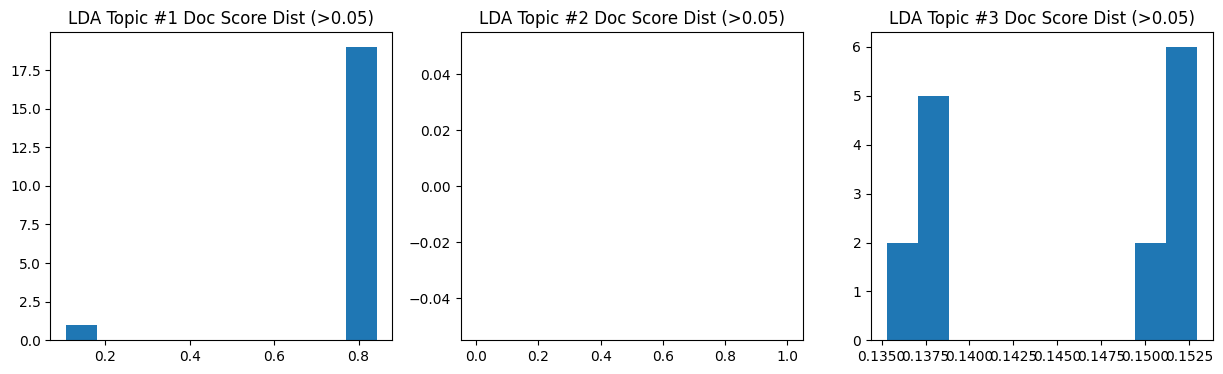

In [174]:
# LDA Topic documents for topics 0-2
plt.figure(figsize=(15,4))
for i in range(3):
    series = pd.Series(text_lda[:,i])
    plt.subplot(1,3,i+1)
    plt.hist(series[series > 0.05])
    plt.title('LDA Topic #{} Doc Score Dist (>0.05)'.format(i+1))
plt.show()

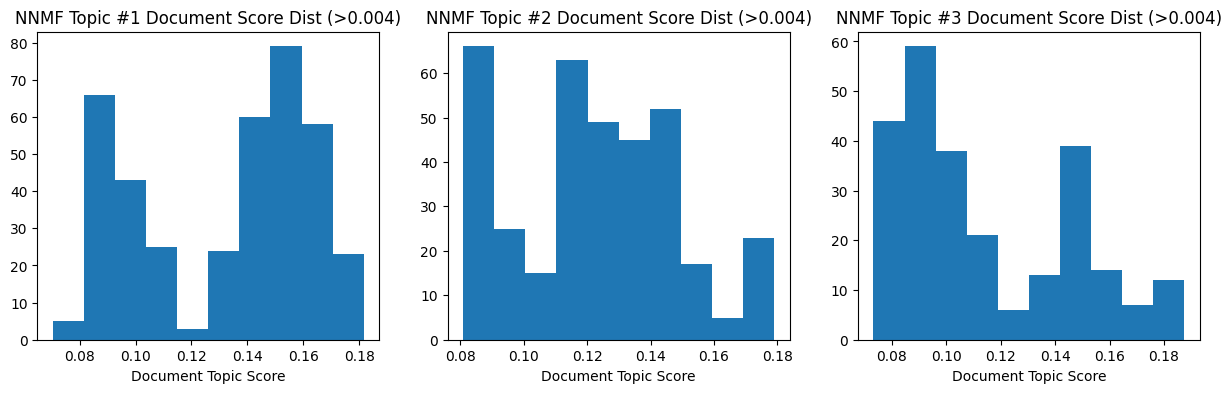

In [175]:
# NNMF Topic documents for topics 0-2
plt.figure(figsize=(15,4))
for i in range(3):
    series = pd.Series(text_nmf[:,i])
    plt.subplot(1,3,i+1)
    plt.hist(series[series > 0.004])
    plt.title('NNMF Topic #{} Document Score Dist (>0.004)'.format(i+1))
    plt.xlabel('Document Topic Score')
#plt.savefig('DocsByTop_Score_Distributions.png', transparent = True)
plt.show()

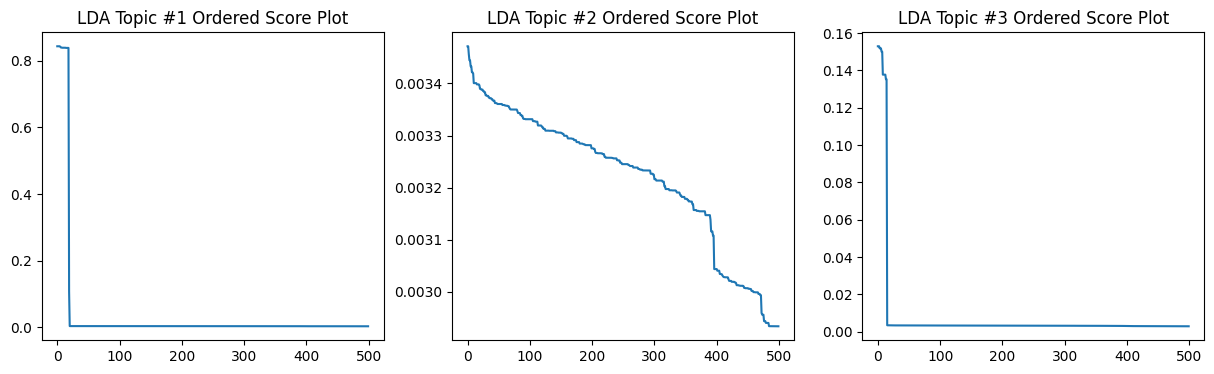

In [176]:
# LDA Topic document scores for topics 0-2
plt.figure(figsize=(15,4))
for i in range(3):
    series = pd.Series(text_lda[:,i]).copy().sort_values(ascending = False).reset_index(drop = True)
    plt.subplot(1,3,i+1)
    plt.plot(series[:1000])
    plt.title('LDA Topic #{} Ordered Score Plot'.format(i+1))
plt.show()

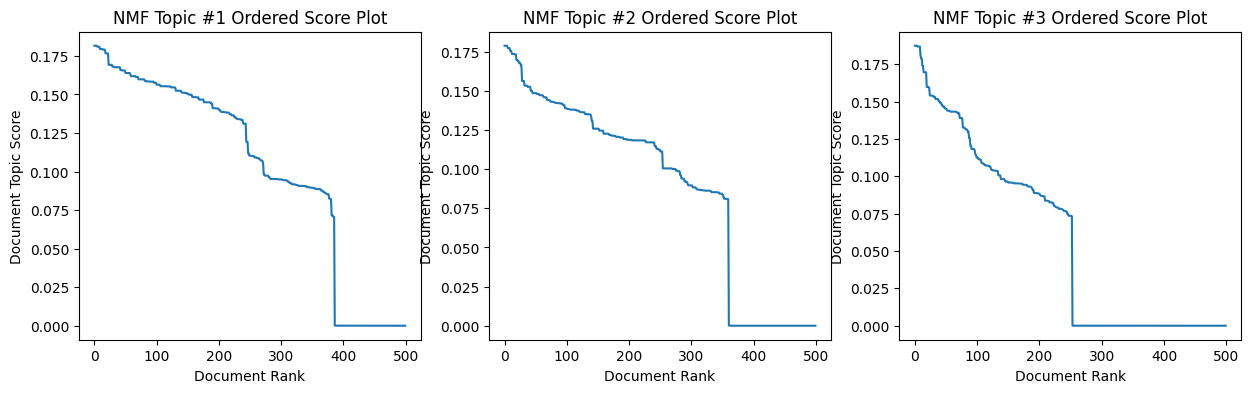

In [177]:
# NMF Topic document scores for topics 0-2
plt.figure(figsize=(15,4))
for i in range(3):
    series = pd.Series(text_nmf[:,i]).copy().sort_values(ascending = False).reset_index(drop = True)
    plt.subplot(1,3,i+1)
    plt.plot(series[:1000])
    plt.title('NMF Topic #{} Ordered Score Plot'.format(i+1))
    plt.xlabel('Document Rank')
    plt.ylabel('Document Topic Score')
#plt.savefig('DocsByTop_Score_Elbows.png', transparent = True)
plt.show()

In [178]:
# Set All Recommendation Model Parameters
N_topics = 50             # Number of Topics to Extract from corpora
N_top_docs = 200          # Number of top documents within each topic to extract keywords
N_top_words = 25          # Number of keywords to extract from each topic
N_docs_categorized = 2000 # Number of top documents within each topic to tag
N_neighbor_window = 4     # Length of word-radius that defines the neighborhood for
                          # each word in the TextRank adjacency table

# Query Similarity Weights
w_title = 0.2
w_text = 0.3
w_categories = 0.5
w_array = np.array([w_title, w_text, w_categories])

# Recipe Stopwords: for any high volume food recipe terminology that doesn't contribute
# to the searchability of a recipe. This list must be manually created.
recipe_stopwords = ['cup','cups','ingredient','ingredients','teaspoon','teaspoons','tablespoon',
                   'tablespoons','C','F']

In [179]:
# Renaming Data Dependencies
topic_transformed_matrix = text_nmf
root_text_data = cleaned_text

Generating tags (keywords/categories) and assigning to corresponding documents

In [180]:
from itertools import repeat

#recipes['tag_list'] = [[] for i in repeat(None, recipes.shape[0])]

def topic_docs_4kwsummary(topic_document_scores, root_text_data):
    '''Gathers and formats the top recipes in each topic'''
    text_index = pd.Series(topic_document_scores).sort_values(ascending = False)[:N_top_docs].index
    text_4kwsummary = pd.Series(root_text_data)[text_index]
    return text_4kwsummary

def generate_filter_kws(text_list):
    '''Filters out specific parts of speech and stop words from the list of potential keywords'''
    parsed_texts = nlp(' '.join(text_list))
    kw_filts = set([str(word) for word in parsed_texts
                if (word.pos_== ('NOUN' or 'ADJ' or 'VERB'))
                and word.lemma_ not in recipe_stopwords])
    return list(kw_filts), parsed_texts

def generate_adjacency(kw_filts, parsed_texts):
    '''Tabulates counts of neighbors in the neighborhood window for each unique word'''
    adjacency = pd.DataFrame(columns=kw_filts, index=kw_filts, data = 0)
    for i, word in enumerate(parsed_texts):
      if any ([str(word) == item for item in kw_filts]):
            end = min(len(parsed_texts), i+N_neighbor_window+1) # Neighborhood Window Utilized Here
            nextwords = parsed_texts[i+1:end]
            inset = [str(x) in kw_filts for x in nextwords]
            neighbors = [str(nextwords[i]) for i in range(len(nextwords)) if inset[i]]
            if neighbors:
                adjacency.loc[str(word), neighbors] += 1
    return adjacency

def generate_wordranks(adjacency):
    '''Runs TextRank on adjacency table'''
    nx_words = nx.from_numpy_matrix(adjacency.values)
    ranks=nx.pagerank(nx_words, alpha=.85, tol=.00000001)
    return ranks

def generate_tag_list(ranks):
    '''Uses TextRank ranks to return actual key words for each topic in rank order'''
    rank_values = [i for i in ranks.values()]
    ranked = pd.DataFrame(zip(rank_values, list(kw_filts))).sort_values(by=0,axis=0,ascending=False)
    kw_list = ranked.iloc[:N_top_words,1].to_list()
    return kw_list

# Master Function utilizing all above functions
def generate_tags(topic_document_scores, root_text_data):
    text_4kwsummary = topic_docs_4kwsummary(topic_document_scores, root_text_data)
    kw_filts, parsed_texts = generate_filter_kws(text_4kwsummary)
    adjacency = generate_adjacency(kw_filts, parsed_texts)
    ranks = generate_wordranks(adjacency)
    kw_list = generate_tag_list(ranks)
    return kw_list

def generate_kw_index(topic_document_scores):
    kw_index = pd.Series(topic_document_scores).sort_values(ascending = False)[:N_docs_categorized].index
    return kw_index


In [183]:
from itertools import repeat

#recipes['tag_list'] = [[] for i in repeat(None, recipes.shape[0])]

def topic_docs_4kwsummary(topic_document_scores, root_text_data):
    '''Gathers and formats the top recipes in each topic'''
    text_index = pd.Series(topic_document_scores).sort_values(ascending = False)[:N_top_docs].index
    text_4kwsummary = pd.Series(root_text_data)[text_index]
    return text_4kwsummary

def generate_filter_kws(text_list):
    '''Filters out specific parts of speech and stop words from the list of potential keywords'''
    parsed_texts = nlp(' '.join(text_list))
    # Use a list comprehension to ensure uniqueness while preserving order
    kw_filts = list({str(word) for word in parsed_texts
                if (word.pos_ in ('NOUN', 'ADJ', 'VERB'))
                and word.lemma_ not in recipe_stopwords})
    return kw_filts, parsed_texts

def generate_adjacency(kw_filts, parsed_texts):
    '''Tabulates counts of neighbors in the neighborhood window for each unique word'''
    adjacency = pd.DataFrame(columns=kw_filts, index=kw_filts, data = 0)
    for i, word in enumerate(parsed_texts):
      if any ([str(word) == item for item in kw_filts]):
            end = min(len(parsed_texts), i+N_neighbor_window+1) # Neighborhood Window Utilized Here
            nextwords = parsed_texts[i+1:end]
            inset = [str(x) in kw_filts for x in nextwords]
            neighbors = [str(nextwords[i]) for i in range(len(nextwords)) if inset[i]]
            if neighbors:
                # Use .loc with a loop to handle potential duplicate column names
                for neighbor in neighbors:
                    if neighbor in adjacency.columns:  # Check if column exists
                        adjacency.loc[str(word), neighbor] += 1
    return adjacency

def generate_wordranks(adjacency):
    '''Runs TextRank on adjacency table'''
    nx_words = nx.from_numpy_matrix(adjacency.values)
    ranks=nx.pagerank(nx_words, alpha=.85, tol=.00000001)
    return ranks

def generate_tag_list(ranks):
    '''Uses TextRank ranks to return actual key words for each topic in rank order'''
    rank_values = [i for i in ranks.values()]
    ranked = pd.DataFrame(zip(rank_values, list(kw_filts))).sort_values(by=0,axis=0,ascending=False)
    kw_list = ranked.iloc[:N_top_words,1].to_list()
    return kw_list

# Master Function utilizing all above functions
def generate_tags(topic_document_scores, root_text_data):
    text_4kwsummary = topic_docs_4kwsummary(topic_document_scores, root_text_data)
    kw_filts, parsed_texts = generate_filter_kws(text_4kwsummary)
    adjacency = generate_adjacency(kw_filts, parsed_texts)
    ranks = generate_wordranks(adjacency)
    kw_list = generate_tag_list(ranks)
    return kw_list

def generate_kw_index(topic_document_scores):
    kw_index = pd.Series(topic_document_scores).sort_values(ascending = False)[:N_docs_categorized].index
    return kw_index

In [247]:
# Assuming 'recipes' DataFrame exists

for i in range(topic_transformed_matrix.shape[1]):
    scores = topic_transformed_matrix[:, i]
    topic_kws = generate_tags(scores, root_text_data)  # Using the modified generate_tags function
    kw_index_4df = generate_kw_index(scores)

    # Iterate through documents and add tags
    for index in kw_index_4df:
        # Check if 'Title' column exists and initialize as a list if necessary for the entire column
        if 'Title' not in recipes.columns:
            recipes['Title'] = [[] for _ in range(recipes.shape[0])]  # Initialize the entire column with empty lists
        # If 'Title' already exists and the current cell isn't a list, convert it to a list
        elif not isinstance(recipes.loc[index, 'Title'], list):
            recipes.loc[index, 'Title'] = [recipes.loc[index, 'Title']]  # Convert existing value to a list

        # Now you can safely extend the list with topic keywords
        recipes.loc[index, 'Title'].extend(topic_kws)

    # Print checkpoint for each topic
    print('Topic #{} Checkpoint'.format(i))

print('done!')

Topic #0 Checkpoint
Topic #1 Checkpoint
Topic #2 Checkpoint
Topic #3 Checkpoint
Topic #4 Checkpoint
Topic #5 Checkpoint
Topic #6 Checkpoint
Topic #7 Checkpoint
Topic #8 Checkpoint
Topic #9 Checkpoint
Topic #10 Checkpoint
Topic #11 Checkpoint
Topic #12 Checkpoint
Topic #13 Checkpoint
Topic #14 Checkpoint
Topic #15 Checkpoint
Topic #16 Checkpoint
Topic #17 Checkpoint
Topic #18 Checkpoint
Topic #19 Checkpoint
Topic #20 Checkpoint
Topic #21 Checkpoint
Topic #22 Checkpoint
Topic #23 Checkpoint
Topic #24 Checkpoint
Topic #25 Checkpoint
Topic #26 Checkpoint
Topic #27 Checkpoint
Topic #28 Checkpoint
Topic #29 Checkpoint
Topic #30 Checkpoint
Topic #31 Checkpoint
Topic #32 Checkpoint
Topic #33 Checkpoint
Topic #34 Checkpoint
Topic #35 Checkpoint
Topic #36 Checkpoint
Topic #37 Checkpoint
Topic #38 Checkpoint
Topic #39 Checkpoint
Topic #40 Checkpoint
Topic #41 Checkpoint
Topic #42 Checkpoint
Topic #43 Checkpoint
Topic #44 Checkpoint
Topic #45 Checkpoint
Topic #46 Checkpoint
Topic #47 Checkpoint
To

In [248]:
# Saving the precious dataframe so that I never have to calculate that again.
recipes.to_csv('tagged_recipes_df.csv')

In [249]:
scores = topic_transformed_matrix[:,1]
topic_kws = generate_tags(scores, root_text_data)
kw_index_4df = generate_kw_index(scores)

# Iterate through documents and add tags
for index in kw_index_4df:
    # Check if 'Title' column contains lists, and convert if necessary
    if not isinstance(recipes.loc[index, 'Title'], list):
        recipes.loc[index, 'Title'] = [recipes.loc[index, 'Title']]

    # Extend the 'Title' column with the list of keywords
    recipes.loc[index, 'Title'].extend(topic_kws)

In [250]:
recipes.loc[:5,'Title']

,Title
0,[kofta potatoes ground oil yogurt tender mutto...
1,[saag potatoes ground oil yogurt tender mutton...
2,[khichdi potatoes ground oil yogurt tender mut...
3,[chicken karahi potatoes ground oil yogurt ten...
4,[paya potatoes ground oil yogurt tender mutton...
5,[chicken korma potatoes ground oil yogurt tend...


In [257]:
# Concatenating lists of tags into a string a collective of tags for each documents
recipes['tags'] = [' '.join(tags) for tags in recipes['Title']]

In [258]:
recipes.loc[:5,'tags']


,tags
0,kofta potatoes ground oil yogurt tender mutton...
1,saag potatoes ground oil yogurt tender mutton ...
2,khichdi potatoes ground oil yogurt tender mutt...
3,chicken karahi potatoes ground oil yogurt tend...
4,paya potatoes ground oil yogurt tender mutton ...
5,chicken korma potatoes ground oil yogurt tende...


In [253]:
recipes.columns

Index(['ID', 'Title', 'Ingredients', 'Spices', 'Recipe', 'Cooking Time',
       'Calories per 50g', 'Calories per 100g', 'Ingredients_string',
       'Ingredient_count', 'tag_list', 'tags'],
      dtype='object')

In [254]:
# Creating TF-IDF Matrices and recalling text dependencies

'''import text_tokenized.csv here'''

# TF-IDF vectorizer instance
'''vectorizer = TfidfVectorizer(lowercase = True,
                            ngram_range = (1,1))'''

'''text_tfidf = vectorizer.fit_transform(tokenized_text)'''
# title_tfidf = vectorizer.transform(recipes['title'])
# text_tfidf    <== Variable with recipe ingredients and instructions
# tags_tfidf = vectorizer.transform(recipes['tags'])
# recipes   <== DataFrame; For indexing and printing recipes

# Query Similarity Weights
w_title = .2
w_text = .3
w_categories = .5

In [255]:
def qweight_array(query_length, qw_array = [1]):
    '''Returns descending weights for ranked query ingredients'''
    if query_length > 1:
        to_split = qw_array.pop()
        split = to_split/2
        qw_array.extend([split, split])
        return qweight_array(query_length - 1, qw_array)
    else:
        return np.array(qw_array)

def ranked_query(query):
    '''Called if query ingredients are ranked in order of importance.
    Weights and adds each ranked query ingredient vector.'''
    query = [[q] for q in query]      # place words in seperate documents
    q_vecs = [vectorizer.transform(q) for q in query]
    qw_array = qweight_array(len(query),[1])
    q_weighted_vecs = q_vecs * qw_array
    q_final_vector = reduce(np.add,q_weighted_vecs)
    return q_final_vector
def overall_scores(query_vector):
    '''Calculates Query Similarity Scores against recipe Title, instructions, and keywords.
    Then returns weighted averages of similarities for each recipe.'''
    final_scores = title_tfidf*query_vector.T*w_title
    final_scores += text_tfidf*query_vector.T*w_text
    final_scores += tags_tfidf*query_vector.T*w_categories
    return final_scores

def print_recipes(index, query, recipe_range):
    '''Prints recipes according to query similary ranks'''
    print('Search Query: {}\n'.format(query))
    for i, index in enumerate(index, recipe_range[0]):
        print('Recipe Rank: {}\t'.format(i+1),recipes.loc[index, 'Title'],'\n')
        print('Ingredients:\n{}\n '.format(recipes.loc[index, 'Ingredients']))
        print('Instructions:\n{}\n'.format(recipes.loc[index, 'Recipe']))

def Search_Recipes(query, query_ranked=False, recipe_range=(0,3)):
    '''Master Recipe Search Function'''
    if query_ranked == True:
        q_vector = ranked_query(query)
    else:
        q_vector = vectorizer.transform([' '.join(query)])
    recipe_scores = overall_scores(q_vector)
    sorted_index = pd.Series(recipe_scores.toarray().T[0]).sort_values(ascending = False)[recipe_range[0]:recipe_range[1]].index
    return print_recipes(sorted_index, query, recipe_range)


In [267]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from functools import reduce
import numpy as np

# Load the Excel file
df = pd.read_excel('Pakistani_Dishes_Enhanced.xlsx')

# Standardize all column names
df.columns = df.columns.str.lower().str.strip()

# Check available columns
print("Available columns:", df.columns.tolist())

#If the tags column does not exist, create it, else skip this part.
if 'tags' not in df.columns:
    df['tags'] = '' # Initialize 'tags' column with empty strings if it doesn't exist


# TF-IDF vectorizer instance
vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(1, 1))

# Fit and transform on the 'ingredients' column  (Adjust column name as needed)
text_tfidf = vectorizer.fit_transform(df['ingredients'].fillna(''))

# Transform other columns using the fitted vectorizer
title_tfidf = vectorizer.transform(df['title'].fillna(''))
tags_tfidf = vectorizer.transform(df['tags'].fillna(''))  # Now it should work

# ... (Rest of your code)

# Query Similarity Weights
w_title = 0.2
w_text = 0.3
w_categories = 0.5


def qweight_array(query_length, qw_array=[1]):
    """Returns descending weights for ranked query ingredients"""
    if query_length > 1:
        to_split = qw_array.pop()
        split = to_split / 2
        qw_array.extend([split, split])
        return qweight_array(query_length - 1, qw_array)
    else:
        return np.array(qw_array)


def ranked_query(query):
    """Called if query ingredients are ranked in order of importance.
    Weights and adds each ranked query ingredient vector."""
    query = [[q] for q in query]  # place words in separate documents
    q_vecs = [vectorizer.transform(q) for q in query]
    qw_array = qweight_array(len(query), [1])
    q_weighted_vecs = [q_vec * weight for q_vec, weight in zip(q_vecs, qw_array)]
    q_final_vector = reduce(lambda x, y: x + y if x is not None else y, q_weighted_vecs)
    return q_final_vector


def overall_scores(query_vector):
    """Calculates Query Similarity Scores against recipe title, instructions, and keywords.
    Then returns weighted averages of similarities for each recipe."""
    final_scores = title_tfidf * query_vector.T * w_title
    final_scores += text_tfidf * query_vector.T * w_text
    final_scores += tags_tfidf * query_vector.T * w_categories
    return final_scores


def print_recipes(index, query, recipe_range):
    """Prints recipes according to query similarity ranks"""
    print("Search Query:", query, "\n")
    for i, index in enumerate(index, recipe_range[0]):
        print("Recipe Rank:", i + 1, "\t", recipes.loc[index, "Title"], "\n")
        print("Ingredients:\n", recipes.loc[index, "Ingredients"], "\n")
        print("Instructions:\n", recipes.loc[index, "Recipe"], "\n")


def Search_Recipes(query, query_ranked=False, recipe_range=(0, 3)):
    """Master Recipe Search Function"""
    if query_ranked:
        q_vector = ranked_query(query)
    else:
        q_vector = vectorizer.transform([" ".join(query)])
    recipe_scores = overall_scores(q_vector)
    sorted_index = (
        pd.Series(recipe_scores.toarray().T[0])
        .sort_values(ascending=False)[recipe_range[0] : recipe_range[1]]
        .index
    )
    return print_recipes(sorted_index, query, recipe_range)


# Now call your function safely
query = ["butter", "oil", "chicken"]
Search_Recipes(query, query_ranked=True, recipe_range=(0, 3))

Available columns: ['id', 'title', 'ingredients', 'spices', 'recipe', 'cooking time', 'calories per 50g', 'calories per 100g']
Search Query: ['butter', 'oil', 'chicken'] 

Recipe Rank: 1 	 ['chicken handi potatoes ground oil yogurt tender mutton vegetables salt chili masala ghee powder preparation spices chicken simmer turmeric butter beef oilghee lentils heat ground yogurt beef simmer turmeric oilghee mutton lentils preparation ghee potatoes powder masala oil salt spices chicken vegetables butter tender chili heat oil heat oilghee potatoes simmer mutton masala preparation chicken ground lentils salt ghee tender yogurt chili vegetables spices turmeric butter powder beef masala oil heat simmer butter oilghee potatoes lentils ground salt chicken mutton turmeric preparation ghee yogurt chili powder vegetables tender spices beef masala oil simmer mutton heat ground lentils turmeric salt chicken preparation oilghee ghee potatoes yogurt chili powder butter vegetables tender spices beef masal

In [269]:
# Test Rank
query = ['tumeric', 'cilantro','butter']
Search_Recipes(query, query_ranked=False, recipe_range=(0,3))

Search Query: ['tumeric', 'cilantro', 'butter'] 

Recipe Rank: 1 	 ['kofta potatoes ground oil yogurt tender mutton vegetables salt chili masala ghee powder preparation spices chicken simmer turmeric butter beef oilghee lentils heat ground yogurt beef simmer turmeric oilghee mutton lentils preparation ghee potatoes powder masala oil salt spices chicken vegetables butter tender chili heat oil heat oilghee potatoes simmer mutton masala preparation chicken ground lentils salt ghee tender yogurt chili vegetables spices turmeric butter powder beef masala oil heat simmer butter oilghee potatoes lentils ground salt chicken mutton turmeric preparation ghee yogurt chili powder vegetables tender spices beef masala oil simmer mutton heat ground lentils turmeric salt chicken preparation oilghee ghee potatoes yogurt chili powder butter vegetables tender spices beef masala oil heat simmer mutton oilghee ground lentils potatoes turmeric salt chicken preparation butter ghee yogurt chili powder vegetab

-- Conclusions and Model Outlook --


In [270]:
# Test
query = ['Butter','Chicken']
Search_Recipes(query, query_ranked=False, recipe_range=(0,3))

Search Query: ['Butter', 'Chicken'] 

Recipe Rank: 1 	 ['tandoori chicken potatoes ground oil yogurt tender mutton vegetables salt chili masala ghee powder preparation spices chicken simmer turmeric butter beef oilghee lentils heat ground yogurt beef simmer turmeric oilghee mutton lentils preparation ghee potatoes powder masala oil salt spices chicken vegetables butter tender chili heat oil heat oilghee potatoes simmer mutton masala preparation chicken ground lentils salt ghee tender yogurt chili vegetables spices turmeric butter powder beef masala oil heat simmer butter oilghee potatoes lentils ground salt chicken mutton turmeric preparation ghee yogurt chili powder vegetables tender spices beef masala oil simmer mutton heat ground lentils turmeric salt chicken preparation oilghee ghee potatoes yogurt chili powder butter vegetables tender spices beef masala oil heat simmer mutton oilghee ground lentils potatoes turmeric salt chicken preparation butter ghee yogurt chili powder vegetabl

In [271]:

query = ['yogurt','vegetables','potatoes']
Search_Recipes(query, query_ranked=False, recipe_range=(0,3))

Search Query: ['yogurt', 'vegetables', 'potatoes'] 

Recipe Rank: 1 	 ['anda paratha potatoes ground oil yogurt tender mutton vegetables salt chili masala ghee powder preparation spices chicken simmer turmeric butter beef oilghee lentils heat ground yogurt beef simmer turmeric oilghee mutton lentils preparation ghee potatoes powder masala oil salt spices chicken vegetables butter tender chili heat oil heat oilghee potatoes simmer mutton masala preparation chicken ground lentils salt ghee tender yogurt chili vegetables spices turmeric butter powder beef masala oil heat simmer butter oilghee potatoes lentils ground salt chicken mutton turmeric preparation ghee yogurt chili powder vegetables tender spices beef masala oil simmer mutton heat ground lentils turmeric salt chicken preparation oilghee ghee potatoes yogurt chili powder butter vegetables tender spices beef masala oil heat simmer mutton oilghee ground lentils potatoes turmeric salt chicken preparation butter ghee yogurt chili powd

In [273]:
recipes['tags'][450]

'tandoori chicken potatoes ground oil yogurt tender mutton vegetables salt chili masala ghee powder preparation spices chicken simmer turmeric butter beef oilghee lentils heat ground yogurt beef simmer turmeric oilghee mutton lentils preparation ghee potatoes powder masala oil salt spices chicken vegetables butter tender chili heat oil heat oilghee potatoes simmer mutton masala preparation chicken ground lentils salt ghee tender yogurt chili vegetables spices turmeric butter powder beef masala oil heat simmer butter oilghee potatoes lentils ground salt chicken mutton turmeric preparation ghee yogurt chili powder vegetables tender spices beef masala oil simmer mutton heat ground lentils turmeric salt chicken preparation oilghee ghee potatoes yogurt chili powder butter vegetables tender spices beef masala oil heat simmer mutton oilghee ground lentils potatoes turmeric salt chicken preparation butter ghee yogurt chili powder vegetables tender spices beef masala oil simmer butter heat grou

In [274]:
### No Category Weight
query = ['yogurt','vegetables','potatoes']
Search_Recipes(query, query_ranked=False, recipe_range=(0,3))

Search Query: ['yogurt', 'vegetables', 'potatoes'] 

Recipe Rank: 1 	 ['anda paratha potatoes ground oil yogurt tender mutton vegetables salt chili masala ghee powder preparation spices chicken simmer turmeric butter beef oilghee lentils heat ground yogurt beef simmer turmeric oilghee mutton lentils preparation ghee potatoes powder masala oil salt spices chicken vegetables butter tender chili heat oil heat oilghee potatoes simmer mutton masala preparation chicken ground lentils salt ghee tender yogurt chili vegetables spices turmeric butter powder beef masala oil heat simmer butter oilghee potatoes lentils ground salt chicken mutton turmeric preparation ghee yogurt chili powder vegetables tender spices beef masala oil simmer mutton heat ground lentils turmeric salt chicken preparation oilghee ghee potatoes yogurt chili powder butter vegetables tender spices beef masala oil heat simmer mutton oilghee ground lentils potatoes turmeric salt chicken preparation butter ghee yogurt chili powd

In [275]:
### Empty Query
query = []
Search_Recipes(query, query_ranked=False, recipe_range=(0,3))

Search Query: [] 

Recipe Rank: 1 	 ['aloo gosht potatoes ground oil yogurt tender mutton vegetables salt chili masala ghee powder preparation spices chicken simmer turmeric butter beef oilghee lentils heat ground yogurt beef simmer turmeric oilghee mutton lentils preparation ghee potatoes powder masala oil salt spices chicken vegetables butter tender chili heat oil heat oilghee potatoes simmer mutton masala preparation chicken ground lentils salt ghee tender yogurt chili vegetables spices turmeric butter powder beef masala oil heat simmer butter oilghee potatoes lentils ground salt chicken mutton turmeric preparation ghee yogurt chili powder vegetables tender spices beef masala oil simmer mutton heat ground lentils turmeric salt chicken preparation oilghee ghee potatoes yogurt chili powder butter vegetables tender spices beef masala oil heat simmer mutton oilghee ground lentils potatoes turmeric salt chicken preparation butter ghee yogurt chili powder vegetables tender spices beef mas

In [279]:
### Only Category Weight
query = ['chicken']
Search_Recipes(query, query_ranked=False, recipe_range=(0,3))

Search Query: ['chicken'] 

Recipe Rank: 1 	 ['tandoori chicken potatoes ground oil yogurt tender mutton vegetables salt chili masala ghee powder preparation spices chicken simmer turmeric butter beef oilghee lentils heat ground yogurt beef simmer turmeric oilghee mutton lentils preparation ghee potatoes powder masala oil salt spices chicken vegetables butter tender chili heat oil heat oilghee potatoes simmer mutton masala preparation chicken ground lentils salt ghee tender yogurt chili vegetables spices turmeric butter powder beef masala oil heat simmer butter oilghee potatoes lentils ground salt chicken mutton turmeric preparation ghee yogurt chili powder vegetables tender spices beef masala oil simmer mutton heat ground lentils turmeric salt chicken preparation oilghee ghee potatoes yogurt chili powder butter vegetables tender spices beef masala oil heat simmer mutton oilghee ground lentils potatoes turmeric salt chicken preparation butter ghee yogurt chili powder vegetables tender 

In [280]:
recipes.tags

,tags
0,kofta potatoes ground oil yogurt tender mutton...
1,saag potatoes ground oil yogurt tender mutton ...
2,khichdi potatoes ground oil yogurt tender mutt...
3,chicken karahi potatoes ground oil yogurt tend...
4,paya potatoes ground oil yogurt tender mutton ...
...,...
495,nihari potatoes ground oil yogurt tender mutto...
496,karela potatoes ground oil yogurt tender mutto...
497,beef curry potatoes ground oil yogurt tender m...
498,anda paratha potatoes ground oil yogurt tender...


In [281]:
recipes.tags[13]

'pakora potatoes ground oil yogurt tender mutton vegetables salt chili masala ghee powder preparation spices chicken simmer turmeric butter beef oilghee lentils heat ground yogurt beef simmer turmeric oilghee mutton lentils preparation ghee potatoes powder masala oil salt spices chicken vegetables butter tender chili heat oil heat oilghee potatoes simmer mutton masala preparation chicken ground lentils salt ghee tender yogurt chili vegetables spices turmeric butter powder beef masala oil heat simmer butter oilghee potatoes lentils ground salt chicken mutton turmeric preparation ghee yogurt chili powder vegetables tender spices beef masala oil simmer mutton heat ground lentils turmeric salt chicken preparation oilghee ghee potatoes yogurt chili powder butter vegetables tender spices beef masala oil heat simmer mutton oilghee ground lentils potatoes turmeric salt chicken preparation butter ghee yogurt chili powder vegetables tender spices beef masala oil simmer butter heat ground lentils

In [283]:
recipes.tags[300]

'mutton chops potatoes ground oil yogurt tender mutton vegetables salt chili masala ghee powder preparation spices chicken simmer turmeric butter beef oilghee lentils heat ground yogurt beef simmer turmeric oilghee mutton lentils preparation ghee potatoes powder masala oil salt spices chicken vegetables butter tender chili heat oil heat oilghee potatoes simmer mutton masala preparation chicken ground lentils salt ghee tender yogurt chili vegetables spices turmeric butter powder beef masala oil heat simmer butter oilghee potatoes lentils ground salt chicken mutton turmeric preparation ghee yogurt chili powder vegetables tender spices beef masala oil simmer mutton heat ground lentils turmeric salt chicken preparation oilghee ghee potatoes yogurt chili powder butter vegetables tender spices beef masala oil heat simmer mutton oilghee ground lentils potatoes turmeric salt chicken preparation butter ghee yogurt chili powder vegetables tender spices beef masala oil simmer butter heat ground l

In [284]:
recipes.head()

,ID,Title,Ingredients,Spices,Recipe,Cooking Time,Calories per 50g,Calories per 100g,Ingredients_string,Ingredient_count,tag_list,tags
0,1,[kofta potatoes ground oil yogurt tender mutto...,"oil, butter, ghee, cream, lemon, mint, cilantr...","green chili, coriander, cumin, ginger, garlic",kofta preparation: prepare ingredients and cho...,82 minutes,105.05,210.10,oil butter ghee cream lemon mint cilantro onio...,21,NaN,kofta potatoes ground oil yogurt tender mutton...
1,2,[saag potatoes ground oil yogurt tender mutton...,"chicken, beef, mutton, lentils, spinach, potat...","green chili, coriander, cumin, ginger, garlic",saag preparation: prepare ingredients and chop...,47 minutes,78.73,157.46,chicken beef mutton lentils spinach potatoes o...,21,NaN,saag potatoes ground oil yogurt tender mutton ...
2,3,[khichdi potatoes ground oil yogurt tender mut...,"onion, tomato, green chili, garlic, ginger, cu...","turmeric, red chili, green chili, coriander, c...",khichdi preparation: prepare ingredients and c...,118 minutes,148.54,297.08,onion tomato green chili garlic ginger cumin c...,23,NaN,khichdi potatoes ground oil yogurt tender mutt...
3,4,[chicken karahi potatoes ground oil yogurt ten...,"yogurt, garam masala, red chili powder, turmer...","turmeric, red chili, green chili, coriander, c...",chicken preparation: prepare ingredients and c...,33 minutes,129.67,259.34,yogurt garam masala red chili powder turmeric ...,23,NaN,chicken karahi potatoes ground oil yogurt tend...
4,5,[paya potatoes ground oil yogurt tender mutton...,"yogurt, garam masala, red chili powder, turmer...","turmeric, red chili, green chili, coriander, c...",paya preparation: prepare ingredients and chop...,62 minutes,133.57,267.14,yogurt garam masala red chili powder turmeric ...,22,NaN,paya potatoes ground oil yogurt tender mutton ...
